In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [3]:
df_train=pd.read_excel('./Data_Train.xlsx')
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [4]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df_train[df_train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
df_train.drop(9039,axis=0, inplace=True)

In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [5]:
# df_test=pd.read_excel('./Test_set.xlsx')
# df_test.head(1)

In [6]:
# final_df=df_train.append(df_test)
# print(final_df.shape)
# final_df.tail(1)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [12]:
df_train['Date_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey'], format = '%d/%m/%Y')
df_train['Date']=df_train['Date_of_Journey'].dt.strftime('%d')
df_train['Month']=df_train['Date_of_Journey'].dt.strftime('%m')
df_train['Year']=df_train['Date_of_Journey'].dt.strftime('%Y')
df_train.head(2)
## OR
# final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
# final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
# final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019


In [14]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
# final_df['Year'].unique()
df_train.drop(['Year'],axis=1,inplace=True)

In [ ]:
# final_df['Date']=final_df['Date'].astype('int64')
# final_df['Month']=final_df['Month'].astype('int64')
# final_df.info()

In [16]:
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05


In [19]:
df_train[df_train['Duration']=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,17327,06,03


In [20]:
df_train.drop(6474,axis=0, inplace=True)

In [24]:
hours=df_train['Duration'].str.split(' ').str[0].str.split('h').str[0].astype('int64')*60
minutes=df_train['Duration'].str.split(' ').str[1].str.split('m').str[0]
minutes.fillna(0,inplace=True)
minutes=minutes.astype('int64')
total_minutes=hours+minutes
df_train['Duration']=total_minutes
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,01,05


In [26]:
def my_func(x):
    x=int(x)
    if x >= 24:
        return '4th Week'
    elif x >= 16:
        return '3rd Week'
    elif x >= 8:
        return '2nd Week'
    else:
        return '1st Week'
df_train['Week of Month']=df_train['Date'].apply(my_func)
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Week of Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03,4th Week
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,01,05,1st Week


In [28]:
def my_func_2(x):
  x=int(x)
  if x>=6 and x<12:
    return 'Morning'
  elif x>=12 and x<18:
    return 'Afternoon'
  elif x>=18 and x<24:
    return 'Evening'
  else:
    return 'Night'
df_train['Arrival Time Slot']=df_train['Arrival_Time'].str.split(':').str[0].apply(my_func_2)
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Week of Month,Arrival Time Slot
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03,4th Week,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,01,05,1st Week,Afternoon


In [29]:
df_train['Dep Time Slot']=df_train['Dep_Time'].str.split(':').str[0].apply(my_func_2)
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Week of Month,Arrival Time Slot,Dep Time Slot
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03,4th Week,Night,Evening
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,01,05,1st Week,Afternoon,Night


In [30]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [31]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [32]:
df_train['Destination'] = df_train['Destination'].apply(lambda x: 'Delhi' if x == 'New Delhi' else x)
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

Flights are of:
1. Del->Coch
2. Kol->Blr
3. Blr->Del
4. Mum->Hyd
5. Chn->Kol

In [33]:
df_train.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Week of Month,Arrival Time Slot,Dep Time Slot
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10,170,non-stop,No info,3897,24,03,4th Week,Night,Evening
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662,01,05,1st Week,Afternoon,Night


<ipython-input-108-3c9561a7953d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Source', y='Price', data=df_train, ci=None, hue='Source',estimator=np.median)


<Axes: xlabel='Source', ylabel='Price'>

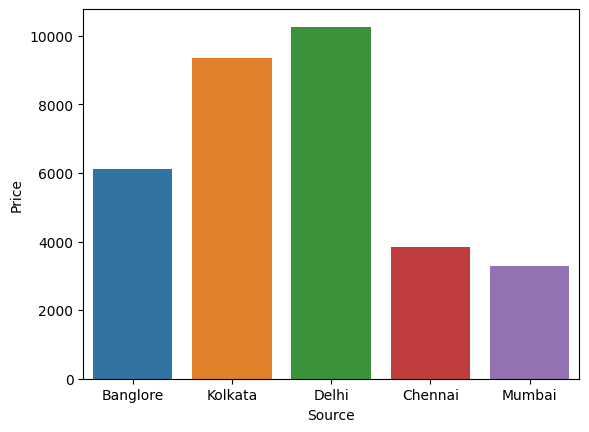

In [108]:
sns.barplot(x = 'Source', y='Price', data=df_train, ci=None, hue='Source',estimator=np.median)

Analysis of Delhi -> Cochin flights

In [107]:
# df_train[df_train['Source']=='Delhi'].head(2)

In [41]:
df_del=df_train[df_train['Source']=='Delhi']
df_del.shape

(4536, 15)

In [42]:
df_del['Total_Stops'].value_counts()

1 stop      3185
2 stops     1113
non-stop     213
3 stops       25
Name: Total_Stops, dtype: int64

In [44]:
df_del.drop(['Route'],axis=1,inplace=True)

<ipython-input-44-94145a0725d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_del.drop(['Route'],axis=1,inplace=True)


In [45]:
df_del.drop(['Source','Destination'],axis=1,inplace=True)
df_del.head(2)

<ipython-input-45-44942248fcbf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_del.drop(['Source','Destination'],axis=1,inplace=True)


,Airline,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Week of Month,Arrival Time Slot,Dep Time Slot
2,Jet Airways,09:25,04:25,1140,2 stops,No info,13882,09,06,2nd Week,Night,Morning
9,Multiple carriers,11:25,19:15,470,1 stop,No info,8625,27,05,4th Week,Evening,Morning


In [56]:
df_del.drop(['Dep_Time','Arrival_Time','Date'],axis=1,inplace=True)
df_del.head(2)

<ipython-input-56-d7c92bad5fa2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_del.drop(['Dep_Time','Arrival_Time','Date'],axis=1,inplace=True)


,Airline,Duration,Total_Stops,Additional_Info,Price,Month,Week of Month,Arrival Time Slot,Dep Time Slot
2,Jet Airways,1140,2 stops,No info,13882,06,2nd Week,Night,Morning
9,Multiple carriers,470,1 stop,No info,8625,05,4th Week,Evening,Morning


In [46]:
df_del['Airline'].unique()

array(['Jet Airways', 'Multiple carriers', 'Air India', 'SpiceJet',
       'GoAir', 'IndiGo', 'Vistara', 'Air Asia',
       'Multiple carriers Premium economy', 'Jet Airways Business'],
      dtype=object)

<ipython-input-57-8114ce0b97d1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Airline', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)


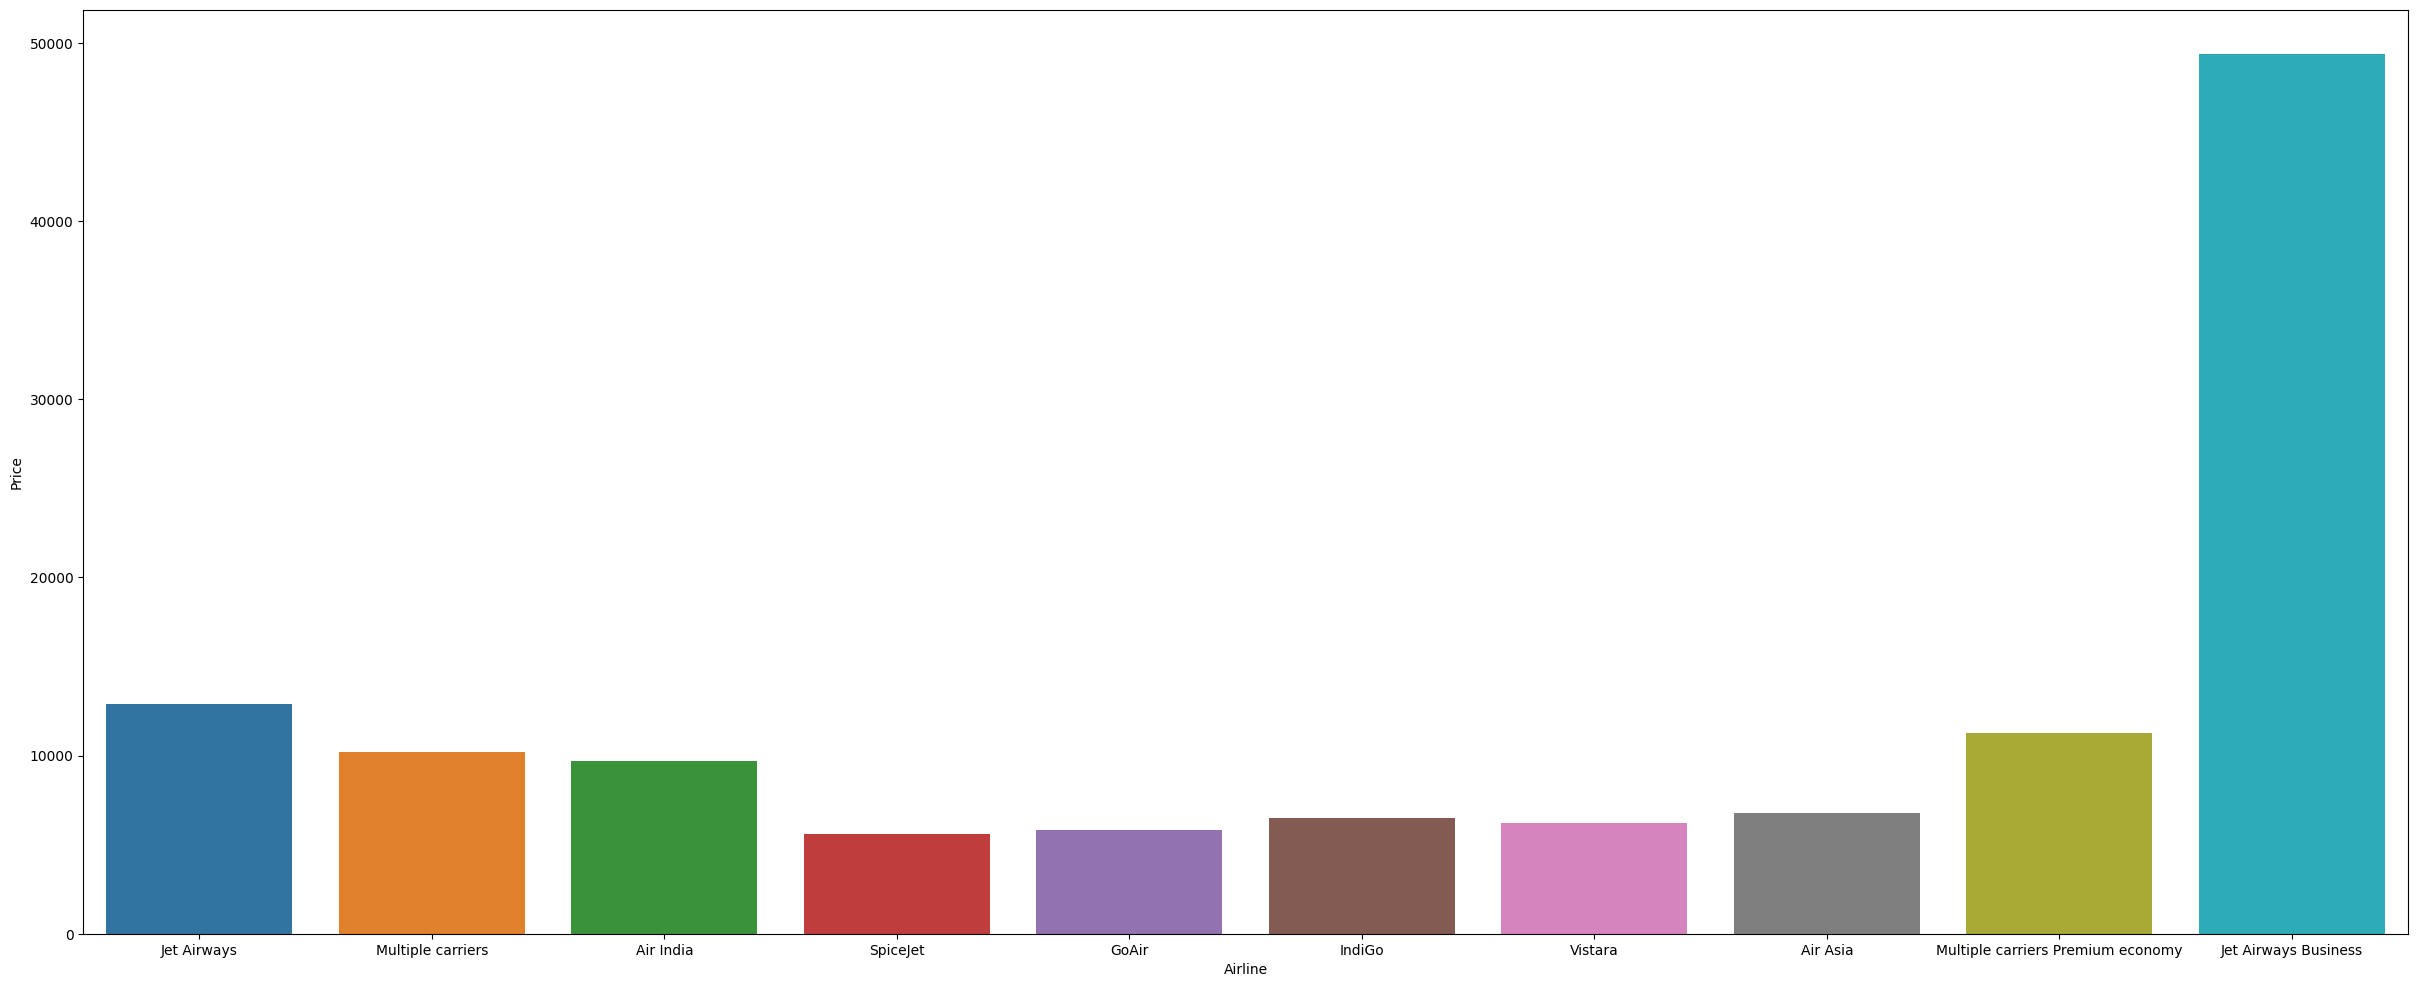

In [57]:
plt.figure(figsize=(30,12))
sns.barplot(x = 'Airline', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)
plt.show()

<ipython-input-63-ab1cd0ce7772>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Total_Stops', y='Price', data=df_del, ci=None, hue='Total_Stops',estimator=np.median)


<Axes: xlabel='Total_Stops', ylabel='Price'>

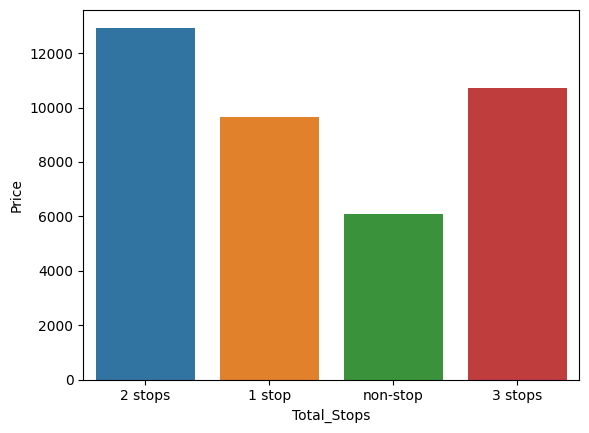

In [63]:
sns.barplot(x = 'Total_Stops', y='Price', data=df_del, ci=None, hue='Total_Stops',estimator=np.median)

<ipython-input-62-73b6b5a4c255>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Total_Stops', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)


<Axes: xlabel='Total_Stops', ylabel='Price'>

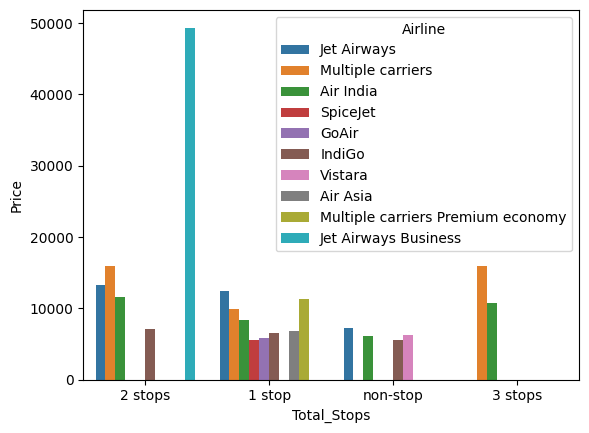

In [62]:
sns.barplot(x = 'Total_Stops', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)

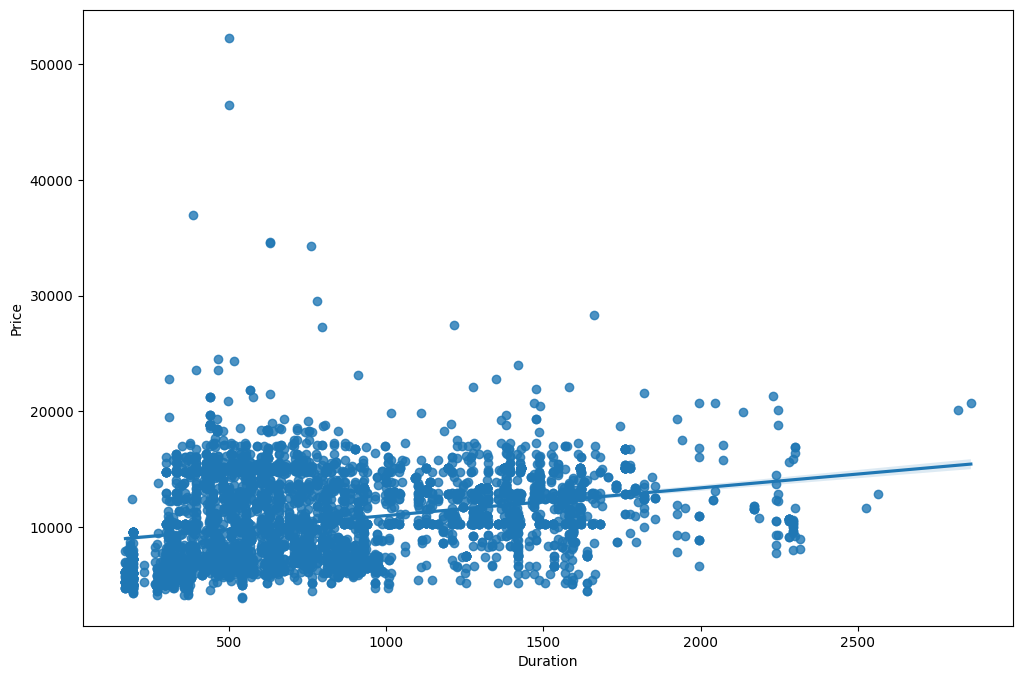

In [70]:
plt.figure(figsize=(12,8))
sns.regplot(x='Duration', y ='Price',data=df_del)
plt.show()

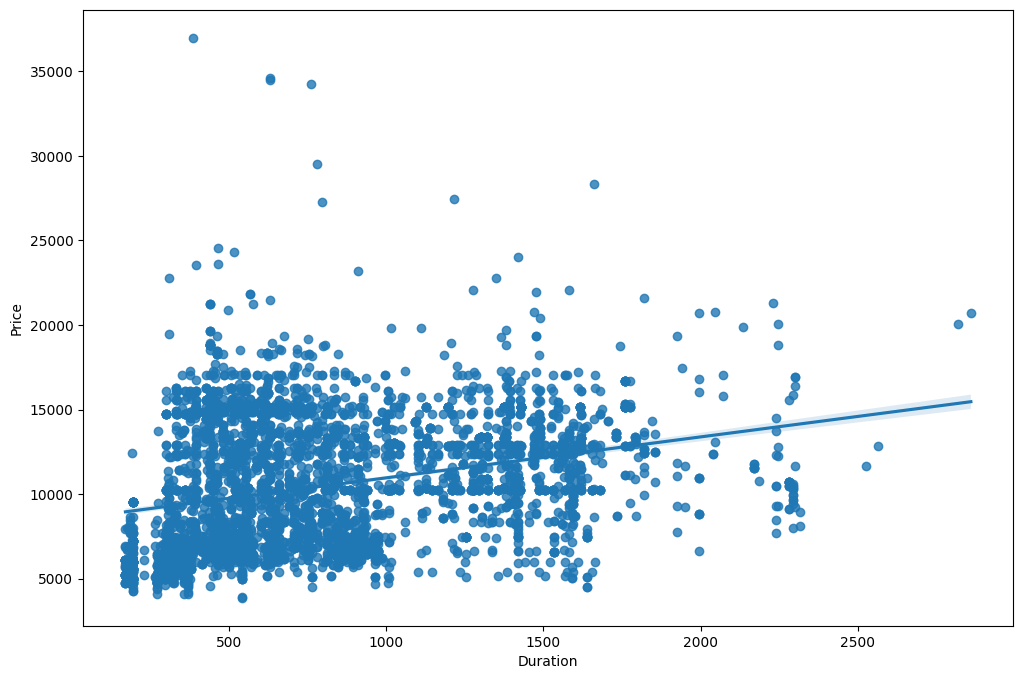

In [79]:
plt.figure(figsize=(12,8))
sns.regplot(x='Duration', y ='Price',data=df_del[df_del['Airline']!='Jet Airways Business'])
plt.show()

In [82]:
df_del['Month'].unique()

array(['06', '05', '03', '04'], dtype=object)

<ipython-input-83-845604f1724f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month', y='Price', data=df_del, ci=None, hue='Month',estimator=np.median)


<Axes: xlabel='Month', ylabel='Price'>

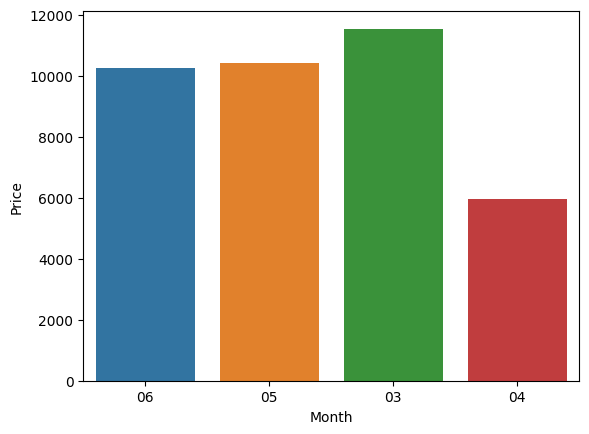

In [83]:
sns.barplot(x = 'Month', y='Price', data=df_del, ci=None, hue='Month',estimator=np.median)

<ipython-input-86-320a1f62e3cd>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Month', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)


<Axes: xlabel='Month', ylabel='Price'>

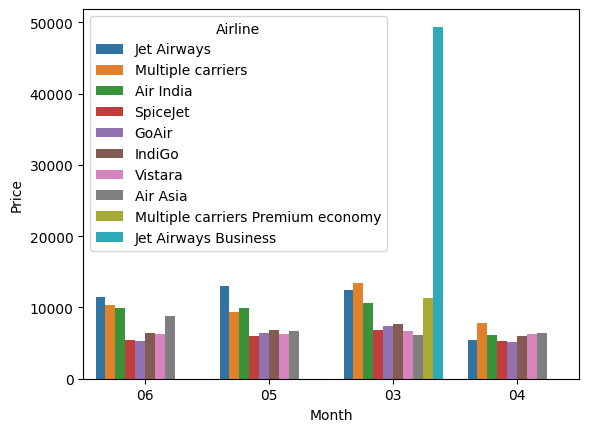

In [86]:
sns.barplot(x = 'Month', y='Price', data=df_del, ci=None, hue='Airline',estimator=np.median)

<ipython-input-87-b705acdbf421>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Week of Month', y='Price', data=df_del, ci=None, hue='Week of Month',estimator=np.median)


<Axes: xlabel='Week of Month', ylabel='Price'>

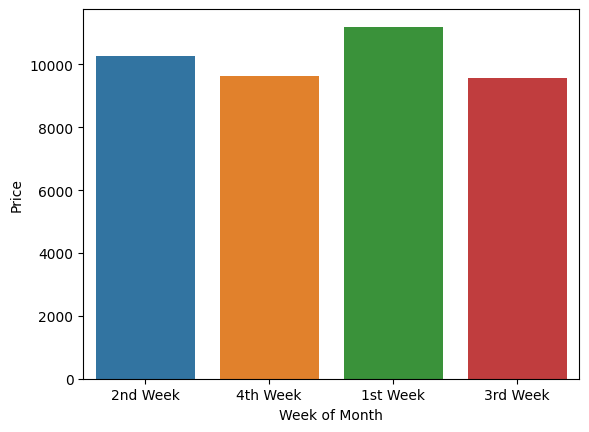

In [87]:
sns.barplot(x = 'Week of Month', y='Price', data=df_del, ci=None, hue='Week of Month',estimator=np.median)

<ipython-input-89-61295d99105f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Arrival Time Slot', y='Price', data=df_del, ci=None, hue='Dep Time Slot',estimator=np.median)


<Axes: xlabel='Arrival Time Slot', ylabel='Price'>

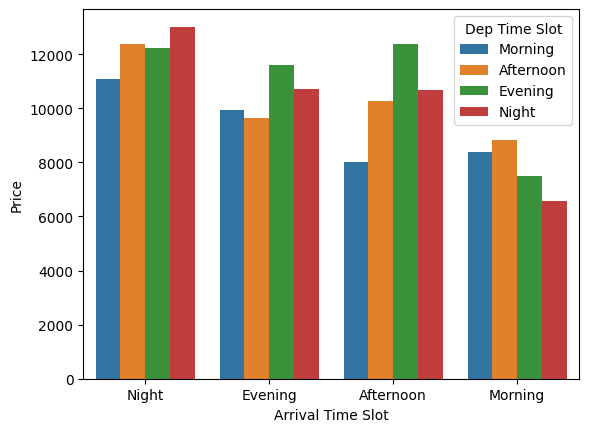

In [89]:
sns.barplot(x = 'Arrival Time Slot', y='Price', data=df_del, ci=None, hue='Dep Time Slot',estimator=np.median)

In [ ]:
# final_df['Arrival_hour']=final_df['Arrival_Time'].str.split(':').str[0]
# final_df['Arrival_minute']=final_df['Arrival_Time'].str.split(':').str[1]
# final_df['Arrival_hour']=final_df['Arrival_hour'].astype('int64')
# final_df['Arrival_minute']=final_df['Arrival_minute'].astype('int64')
# final_df.drop(['Arrival_Time'],axis=1,inplace=True)
# final_df.head(1)

In [ ]:
# final_df['Dep_hour']=final_df['Dep_Time'].str.split(':').str[0]
# final_df['Dep_minute']=final_df['Dep_Time'].str.split(':').str[1]
# final_df['Dep_hour']=final_df['Dep_hour'].astype('int64')
# final_df['Dep_minute']=final_df['Dep_minute'].astype('int64')
# final_df.drop(['Dep_Time'],axis=1,inplace=True)
# final_df.head(1)

In [23]:
# # final_df['Total_Stops'].unique()
# final_df[final_df['Total_Stops'].isnull()]

In [ ]:
# final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'NaN':1})

In [ ]:
# final_df.drop(['Route'],axis=1,inplace=True)

In [22]:
# final_df.head(2)

In [21]:
# # final_df[final_df['Duration']=='5m']

# final_df.drop(6474,axis=0, inplace=True)
# final_df.drop(2660,axis=0, inplace=True)

In [90]:
# hours=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype('int64')*60
# minutes=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
# minutes.fillna(0,inplace=True)
# minutes=minutes.astype('int64')
# total_minutes=hours+minutes
# final_df['Duration']=total_minutes
# final_df.head(2)

In [91]:
# df_train=final_df[~final_df['Price'].isnull()]
# df_train.isnull().sum()

In [92]:
# # df_train[df_train['Route'].isnull()]
# df_train.drop(9039,axis=0, inplace=True)

In [95]:
# df_train.head()

In [96]:
# df_train['Destination'].unique()

In [97]:
# sns.barplot(x='Destination',y='Price',data=df_train)

In [99]:
# df_train['Source'].unique()

In [100]:
# sns.barplot(x='Source',y='Price',data=df_train)

In [101]:
# df_train['Airline'].unique()

In [102]:
# plt.figure(figsize=(30,10))
# sns.barplot(x='Airline',y='Price',data=df_train[df_train['Destination']=='New Delhi'])
# plt.show()

In [103]:
# final_df['Airline'].unique()

In [104]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder=LabelEncoder()

In [105]:
# final_df['Airline']=labelencoder.fit_transform(final_df['Airline'])
# final_df['Source']=labelencoder.fit_transform(final_df['Source'])
# final_df['Destination']=labelencoder.fit_transform(final_df['Destination'])
# final_df['Additional_Info']=labelencoder.fit_transform(final_df['Additional_Info'])

In [106]:
# final_df.head(2)